In [19]:
import numpy as np
import pandas as pd 
import math
import statistics as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv('data.csv')
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


<img src='3.jpg'>

##  **_Mean_ :  Average** of the set of numbers
---
To find the mean, we need to:

    1.Find the total of all the numbers
    2.Then divide by the amount of numbers

Consider 2,2,3,5,8 :

$\LARGE \rightarrow\  2+2+3+5+8 = 20  \rightarrow\ \frac{20}{5}   = 4 $

##### Formulae : 
$$
\begin{align}
\LARGE
{mean} = \Sigma \frac{x}{n}  \\
\end{align}
$$


In [19]:
#Caluclating mean without library function
def my_mean(sample):
        return sum(sample) / len(sample)
my_mean(data['Mthly_HH_Income'])

41558.0

In [20]:
#Caluclating mean with library function
np.mean(data['Mthly_HH_Income'])

41558.0

##  **_Median_ :  Middle** of the set of numbers
---
To find the median, we need to:

    1.Sort the sample
    2.Locate the value in the middle of the sorted sample
\
When locating the number in the middle of a sorted sample, we can face two kinds of situations:

    1.If the sample has an odd number of observations, 
     then the middle value in the sorted sample is the median
    
    2.If the sample has an even number of observations, 
     then we'll need to calculate the mean of the two middle values in the sorted sample
     
\
If we have the sample [3, 5, 1, 4, 2] and want to find its median, then we first sort the sample to [1, 2, 3, 4, 5]. The median would be 3 since that's the value in the middle.

\
On the other hand, if we have the sample [1, 2, 3, 4, 5, 6], then its median will be $ \frac{(3 + 4)} { 2} = 3.5 $

In [21]:
#Caluclating median without library function
def my_median(sample):
    n = len(sample)
    index = n // 2
    # Sample with an odd number of observations
    if n % 2:
        return sorted(sample)[index]
   # Sample with an even number of observations
    return sum(sorted(sample)[index - 1:index + 1]) / 2

In [16]:
my_median(data['Mthly_HH_Income'])

35000.0

In [22]:
#Caluclating median with library function
np.median(data['Mthly_HH_Income'])

35000.0

##  **_Mode_ :  Most Common**  of the set of numbers
---
The mode is the most frequent observation (or observations) in a sample. 

    If we have the sample [4, 1, 2, 2, 3, 5], then its mode is 2 because 2 appears two times in the sample whereas the other elements only appear once.
\
The mode doesn't have to be unique. 

    Some samples have more than one mode. Say we have the sample [4, 1, 2, 2, 3, 5, 4].
    This sample has two modes - 2 and 4 because they're the values that appear more often and both appear the same number of times.
\
The mode is commonly used for categorical data.

$$
\
\Large
Mode = 3(Median) - 2(Mean) 
$$
*approximately for skewed distributions

In [23]:
#Caluclating mode without library function
from collections import Counter

def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

In [25]:
print(my_mode(data['Highest_Qualified_Member']))
my_mode(data['Mthly_HH_Income'])

['Graduate']


[45000]

In [36]:
#Caluclating mode with library function
x=stats.mode(data['Highest_Qualified_Member'])
y=stats.mode(data['Mthly_HH_Income'])
print("Mode of Highest_Qualified_Member :",x)
print("Mode of Mthly_HH_Income :",y)

Mode of Highest_Qualified_Member : Graduate
Mode of Mthly_HH_Income : 45000


#  **Variance**
---
Variance is a statistical measure of how far the numbers in a collection of numbers are scattered from the collection’s average(mean). 


    It tells you about the collection’s degree of dispersion. 


##### In formula it would be :
\
$$
\begin{align}
\LARGE
\sigma^2 = \Sigma \frac{(x-\mu)^2}{N}  \\
\end{align}
$$

\
where σ2 is variance, N is the number of data/observations, X is the data set and the μ is the mean
\
Say we have a dataset [3, 5, 2, 7, 1, 3].




To find its variance, we need to calculate the mean which is:


\
$$
\begin{align}
\Large
\frac{(3+5+2+7+1+3)}{6}=3.5 
\end{align}
$$

\
Then, we need to calculate the sum of the square deviation from the mean of all the observations. Here's how:

\
$$
\begin{align}
\normalsize
{(3-3.5)^2+(5-3.5)^2+(2-3.5)^2+(7-3.5)^2+(1-3.5)^2+(3-3.5)^2 = 23.5}
\end{align}
$$
\
To find the variance, we just need to divide this result by the number of observations like this



\
$$
\begin{align}
\Large
\frac{23.5}{6}=3.91
\end{align}
$$

In [37]:
#Caluclating variance without library function 
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance

In [38]:
variance(data['Annual_HH_Income'])

100437186889.95831

In [40]:
#Caluclating variance with library function 
stats.pvariance(data['Annual_HH_Income'])

100437186889.95839

In [41]:
stats.variance(data['Annual_HH_Income']) 
#That's because variance() uses n - 1 instead of n to calculate the variance

102486925397.91672

#  **Standard Deviation**
---
The standard deviation measures the amount of variation or dispersion of a set of numeric values. 

    Standard deviation is the square root of variance σ2 and is denoted as σ 


##### In formula it would be :
\
$$
\begin{align}
\LARGE
\sigma = \sqrt{\sigma^2}   \\
\end{align}
$$


In [42]:
#Caluclating standard devition without library function

def stdev(data):
    # We relay on our previous implementation for the variance
    return math.sqrt(variance(data))

In [43]:
stdev(data['Annual_HH_Income'])

316918.26531451027

In [46]:
#Caluclating standard devition with library function
stats.stdev(data['Annual_HH_Income'])

320135.7921225253

In [45]:
stats.pstdev(data['Annual_HH_Income'])

316918.2653145104

# **Correlation :**
---
\
Correlation is a standardized statistical measure that expresses the extent to which two variables are linearly related (meaning how much they change together at a constant rate).

\
The strength and directional association of the relationship between two variables are defined by correlation and it ranges from -1 to +1. 

\
Similar to covariance, a positive value denotes that both variables move in the same direction whereas a negative value tells us that they move in opposite directions.

\
The most widely used formula to compute correlation coefficient is Pearson's 'r' :

\
$$
\begin{align}
\LARGE
\ r_{xy} = \frac{\sum \limits_{i=1}^{n} (\ x_i - \overline{x})(\ y_i - \overline{y})}
{\sqrt {\sum \limits_{i=1}^{n} (\ x_i - \overline{x})^2}\sqrt{\sum \limits_{i=1}^{n}(\ y_i - \overline{y})^2}}  \\
\end{align}
$$

In [47]:
#Caluclating correlation without using library funstion
def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    cor = numerator/denominator
    return cor

In [48]:
x=data['Annual_HH_Income']
y=data['Mthly_HH_Expense']
correlation(x,y)

0.5912216295468027

In [54]:
#Calclating pairwise corelation using library function
data.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


<AxesSubplot:>

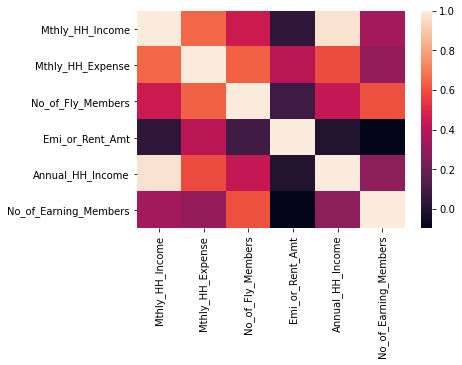

In [56]:
sns.heatmap(data.corr())

# **Normal Distribution :**
---
Frequency distributions are all shapes, but a statistically **normal frequency distribution** has the mean as its mean, its mode, and its median and it looks like a symmetric mound or bell.


### <font color=green>Feature of Normal Distribution:</font>
<font color=red>The Normal Distribution has:</font>

* mean = median = mode  



* Symmetry about the center



* 50% of values less than the mean and 50% greater than the mean



<img src='4.svg'>


<font color=yellow>Three Sigma Rule of Normal Distribution :</font>

The Normal distribution is commonly associated with the 68-95-99.7 rule :


* 68% of the data is within 1 standard deviation (σ) of the mean (μ)   <br> **P (µ - σ < X < µ + σ) = 0.68**,


* 95% of the data is within 2 standard deviations (σ) of the mean (μ) <br>**P (µ - 2σ < X < µ + 2σ) = 0.95** and 


* 99.7% of the data is within 3 standard deviations (σ) of the mean (μ) <br>**P(µ - 3σ < X < µ + 3σ) = 0.99**


<img src='6.png'>

<font color=pink>Probability Density Function:</font>

To be able to understand where the percentages come from, it is important to know about the probability density function (PDF)


The equation below is the probability density function for a normal distribution $ X \sim N(\mu,\sigma^2) \ $ :

$
\text{Probability density function} \\
$
$$
\Large
f (x |\mu \ , \sigma)=\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}}
$$


$$ \ $$
Let’s simplify it by assuming we have a mean (μ) of 0 and a standard deviation (σ) of 1. 
$$ \ $$
$$
\
\Large
f(x)=\frac{1}{\sqrt{2 \pi}}e^{-\frac{x^2}{2}}
$$


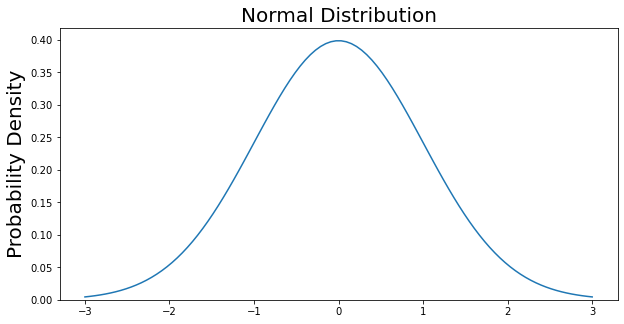

In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

In [8]:
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
# Integrate PDF from -1 to 1
result, _ = quad(normalProbabilityDensity, -1, 1, limit = 1000)
print("Data Within 1 Standard Deviation : ",result ,'\n')
# Integrate PDF from -2 to 2
result, _ = quad(normalProbabilityDensity, -2, 2, limit = 1000)
print("Data Within 2 Standard Deviation : ",result ,'\n')
# Integrate PDF from -3 to 3
result, _ = quad(normalProbabilityDensity, -3, 3, limit = 1000)
print("Data Within 3 Standard Deviation : ",result ,'\n')

Data Within 1 Standard Deviation :  0.682689492137086 

Data Within 2 Standard Deviation :  0.9544997361036417 

Data Within 3 Standard Deviation :  0.9973002039367399 



#### Checking Distribution In Our Data

<AxesSubplot:xlabel='Mthly_HH_Expense', ylabel='Density'>

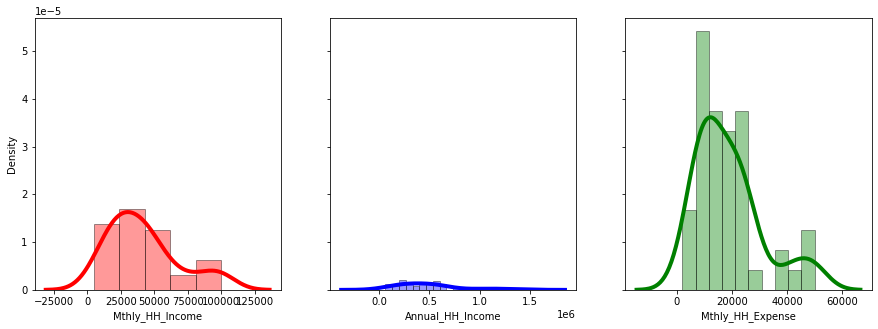

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.distplot(data['Mthly_HH_Income'], hist=True, kde=True, 
             bins=5, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax=axes[0])
sns.distplot(data['Annual_HH_Income'], hist=True, kde=True, 
             bins=20, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax=axes[1])
sns.distplot(data['Mthly_HH_Expense'], hist=True, kde=True, 
             bins=10, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},ax=axes[2])

# **Skewness :**
---
If one tail is longer than another, the distribution is skewed.<br> 


These distributions are  called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry


A <font color=yellow>left-skewed distribution</font> has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A <font color=yellow>Right-skewed distribution</font> has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

<img src='7.jpg'>
$$ \ $$


$$
\Large
Skewness = \frac{Mean-Mode}{Standard Deviation}
$$

# **Effect on Mean, Median and Mode due to Skewness :**
---
In a normal distribution, the mean and the median are the same number while the mean and median in a skewed distribution become different numbers:


$$ \ $$
* A left-skewed, negative distribution will have the mean to the left of the median.
$$ \ $$
$$
\Large
Mean < Median < Mode
$$

$$ \ $$
* A right-skewed distribution will have the mean to the right of the median.
$$ \ $$
$$
\Large
Mean > Median > Mode
$$
$$ \ $$
<img src='8.png'>

In [30]:
#Skewness in our data 
data.skew()

Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

# **_Q Q Plots (Quantile-Quantile plots)_**
---
In Statistics, Q-Q(quantile-quantile) plots play a very vital role to graphically analyze and compare two probability distributions by plotting their quantiles against each other. <br>
$$ \ $$
If the two distributions which we are comparing are exactly equal then the points on the Q-Q plot will perfectly lie on a straight line **y = x**.
$$ \ $$
**Q-Q plots** are used to find the type of distribution for a random variable whether it be a Gaussian Distribution, Uniform Distribution, Exponential Distribution or even Pareto Distribution, etc.
$$ \ $$
<font color='red' size=5.5pt>How does it work ?</font>
$$ \ $$
We plot the theoretical quantiles or basically known as the standard normal variate (a normal distribution with mean=0 and standard deviation=1)on the x-axis and the ordered values for the random variable which we want to find whether it is Gaussian distributed or not, on the y-axis. Which gives a very beautiful and a smooth straight line like structure from each point plotted on the graph.
$$ \ $$
Now we have to focus on the ends of the straight line. If the points at the ends of the curve formed from the points are not falling on a straight line but indeed are scattered significantly from the positions then we cannot conclude a relationship between the x and y axes which clearly signifies that our ordered values which we wanted to calculate are not Normally distributed
$$ \ $$
If all the points plotted on the graph perfectly lies on a straight line then we can clearly say that this distribution is Normally distribution because it is evenly aligned with the standard normal variate which is the simple concept of Q-Q plot

### Let’s make up some data that we already know is normally distributed :

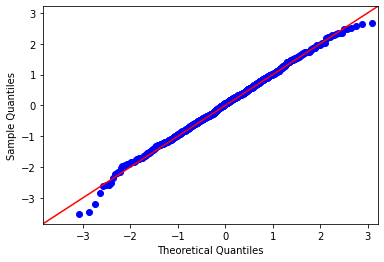

In [31]:
import statsmodels.api as sm

# Generate some normally distributed random numbers
random_normals = [np.random.normal() for i in range(1000)]

# Create QQ plot
sm.qqplot(np.array(random_normals), line='45')
plt.show()

**See how our data (the blue dots) fall pretty cleanly on the red line? That means that our data is normally distributed (which we already knew). $$ \ $$ And that’s it.If our data adheres to the red 45 degree line, it’s normal or close to it, and if it does not, then it’s not normal.**

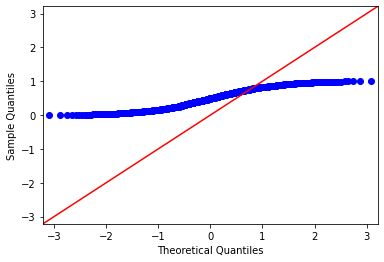

In [32]:
import random
# Generate some uniformly distributed random variables
random_uniform = [random.random() for i in range(1000)]
# Create QQ plot
sm.qqplot(np.array(random_uniform), line='45')
plt.show()

**Our data (the blue dots) is nowhere close to the red line, meaning it’s not normally distributed.**

## **_Box-Cox Transformation_** :
---
When you are dealing with real-world data, you are going to deal with features that are heavily skewed. <BR>Transformation technique is useful to stabilize variance, make the data more normal distribution-like, improve the validity of measures of association.
$$ \ $$
The Box-Cox transformation can be used to transform a non normal distributed data to a more normal distributed data-set.$$ \ $$
The Box-Cox procedure tries find the best exponent to transform the data int to a normal shape. All the data in the data-set will be raised with this factor. $$ \ $$
In order to do this the Box-Cox transformation search in a range form $\lambda$ -10 to $\lambda$ 10 for the factor with the lowest spread.

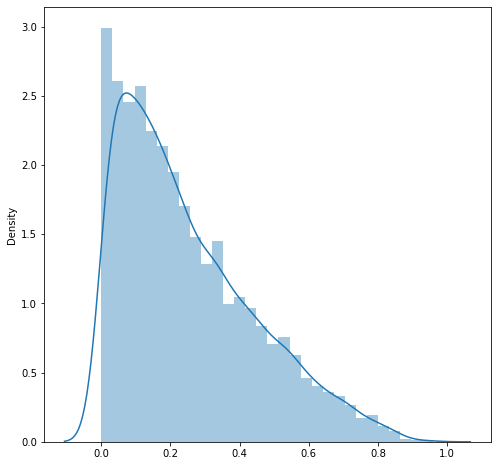

In [33]:
plt.figure(figsize = (8, 8))
data = np.random.beta(1, 3, 5000)
sns.distplot(data)
plt.show()

**We can use the Box-Cox transformation to transform the above into as close to a normal distribution as the Box-Cox transformation permits.**

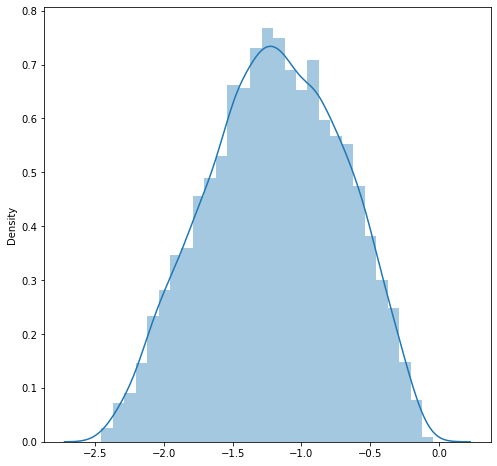

In [37]:
from scipy import stats
tdata = stats.boxcox(data)[0]
plt.figure(figsize = (8, 8))
sns.distplot(tdata)
plt.show()

**And now our data looks more like a normal distribution.**

<font color='Yellow' size=6pt>How does it work ?</font>

---
**The transformation of Y has the form**
$$ \ $$



$$
\Large
y_i^\lambda = \left\{
    \begin{array}\\
        \frac{y_i^\lambda-1}{\lambda} & \mbox{if } \lambda \neq 0 \\
        0 & \mbox{if } \lambda  = 0 \\
    \end{array}
\right.
$$

$$ \ $$
**The Prombem with Box Cox Is Estimation of Lambda**

$$ The \ End $$